<a href="https://colab.research.google.com/github/econdatatech/AIML425/blob/main/Project/Wavelet_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the packages and external tools we need

In [ ]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [28]:
# Install PyDrive
!pip install PyDrive pywavelets --quiet

#Import modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pywt
import os
import errno
from pathlib import Path
import matplotlib.pyplot as plt 
import re
from skimage import io, color
import numpy as np


def create_folder(path):
    try:
        os.mkdir(path)
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
        pass

Mounting gdrive so we can access the public CelebA dataset I'm using

In [ ]:
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Getting 30k celebA 128x128 images from https://drive.google.com/drive/folders/11Vz0fqHS2rXDb5pprgTjpD7S2BAJhi1P 

In [ ]:
downloaded = drive.CreateFile({'id':"107vh6Tibfs1p8pbc3gql-eVwxiqCD2o4"})   
downloaded.GetContentFile('data128x128.zip')       
!unzip -q -j data128x128.zip -d ./root_celebA_128_train

Performing the wavelett transform and store the value range of the transformed image in the file name. Wavelet coefficients are outside of the normal 0 to 255 image range.

In [ ]:
exts = ['jpg', 'jpeg', 'png']
folder = './root_celebA_128_train/'
paths = [p for ext in exts for p in Path(f'{folder}').glob(f'**/*.{ext}')]
create_folder('./root_celebA_128_train/LL')
create_folder('./root_celebA_128_train/LH')
create_folder('./root_celebA_128_train/HL')
create_folder('./root_celebA_128_train/HH')

for idx in range(len(paths)):
    data = io.imread(paths[idx])
    #img = Image.open(paths[idx])
    r, g, b = [c.T for c in data.T]
    cr = pywt.dwt2(r, 'haar')
    cg = pywt.dwt2(g, 'haar')
    cb = pywt.dwt2(b, 'haar')
    LLr, (LHr, HLr, HHr) = cr
    LLg, (LHg, HLg, HHg) = cg
    LLb, (LHb, HLb, HHb) = cb
    rgbLL = np.dstack((LLr,LLg,LLb))
    rgbLH = np.dstack((LHr,LHg,LHb))
    rgbHL = np.dstack((HLr,HLg,HLb))
    rgbHH = np.dstack((HHr,HHg,HHb))
    io.imsave(folder+'LL/' + str(idx) + 'min'+str(rgbLL.min().round(0).astype(int))+'max'+str(rgbLL.max().round(0).astype(int))+'.bmp',((rgbLL-rgbLL.min())*254.999/(rgbLL.max()-rgbLL.min())).round(0).astype(int))
    io.imsave(folder+'LH/' + str(idx) + 'min'+str(rgbLH.min().round(0).astype(int))+'max'+str(rgbLH.max().round(0).astype(int))+'.bmp',((rgbLH-rgbLH.min())*254.999/(rgbLH.max()-rgbLH.min())).round(0).astype(int))
    io.imsave(folder+'HL/' + str(idx) + 'min'+str(rgbHL.min().round(0).astype(int))+'max'+str(rgbHL.max().round(0).astype(int))+'.bmp',((rgbHL-rgbHL.min())*254.999/(rgbHL.max()-rgbHL.min())).round(0).astype(int))
    io.imsave(folder+'HH/' + str(idx) + 'min'+str(rgbHH.min().round(0).astype(int))+'max'+str(rgbHH.max().round(0).astype(int))+'.bmp',((rgbHH-rgbHH.min())*254.999/(rgbHH.max()-rgbHH.min())).round(0).astype(int))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: ./root_celebA_128_train/LL/29375min0max507.bmp is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: ./root_celebA_128_train/LH/29375min-194max172.bmp is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: ./root_celebA_128_train/HL/29375min-146max149.bmp is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: ./root_celebA_128_train/HH/29375min-87max90.bmp is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: ./root_celebA_128_train/LL/29376min0max459.bmp is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: ./root_celebA_128_train/LH/29376min-71max73.bmp is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykerne

Visualizing the Wavelet transform results for the red channel

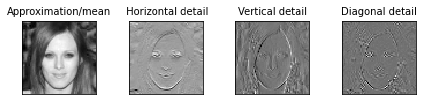

In [29]:
data = io.imread(paths[0])
r, g, b = [c.T for c in data.T]
cr = pywt.dwt2(r, 'haar')
cg = pywt.dwt2(g, 'haar')
cb = pywt.dwt2(b, 'haar')

LLr, (LHr, HLr, HHr) = cr
LLg, (LHg, HLg, HHg) = cg
LLb, (LHb, HLb, HHb) = cb


titles = ['Approximation/mean', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(6, 3))
for i, a in enumerate([LLr, LHr, HLr, HHr]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

Restorign the original image from the sub images. Mainly just to test if I did everything righ.

In [24]:
create_folder('./root_celebA_128_train/Restored')
exts = ['bmp']
folderLL = './root_celebA_128_train/LL/'
folderLH = './root_celebA_128_train/LH/'
folderHL = './root_celebA_128_train/HL/'
folderHH = './root_celebA_128_train/HH/'


for idx in range(30000):
    pathsLL = [p for ext in exts for p in Path(f'{folderLL}').glob(f'**/{idx}min*.{ext}')]
    pathsLH = [p for ext in exts for p in Path(f'{folderLH}').glob(f'**/{idx}min*.{ext}')]
    pathsHL = [p for ext in exts for p in Path(f'{folderHL}').glob(f'**/{idx}min*.{ext}')]
    pathsHH = [p for ext in exts for p in Path(f'{folderHH}').glob(f'**/{idx}min*.{ext}')]
    
    dataLL = io.imread(pathsLL[0])
    dataLH = io.imread(pathsLH[0])
    dataHL = io.imread(pathsHL[0])
    dataHH = io.imread(pathsHH[0])
    minLL = int(re.search('min(.*)max', str(pathsLL[0])).group(1))
    minLH = int(re.search('min(.*)max', str(pathsLH[0])).group(1))
    minHL = int(re.search('min(.*)max', str(pathsHL[0])).group(1))
    minHH = int(re.search('min(.*)max', str(pathsHH[0])).group(1))
    maxLL = int(re.search('max(.*).bmp', str(pathsLL[0])).group(1))
    maxLH = int(re.search('max(.*).bmp', str(pathsLH[0])).group(1))
    maxHL = int(re.search('max(.*).bmp', str(pathsHL[0])).group(1))
    maxHH = int(re.search('max(.*).bmp', str(pathsHH[0])).group(1))
    LLr, LLg, LLb = [c.T for c in dataLL.T/255*(maxLL-minLL)+minLL]
    LHr, LHg, LHb = [c.T for c in dataLH.T/255*(maxLH-minLH)+minLH]
    HLr, HLg, HLb = [c.T for c in dataHL.T/255*(maxHL-minHL)+minHL]
    HHr, HHg, HHb = [c.T for c in dataHH.T/255*(maxHH-minHH)+minHH]

    cr = LLr, (LHr, HLr, HHr) 
    cg = LLg, (LHg, HLg, HHg) 
    cb = LLb, (LHb, HLb, HHb)

    restr=pywt.idwt2(cr, 'haar')
    restg=pywt.idwt2(cg, 'haar')
    restb=pywt.idwt2(cb, 'haar')

    rgb = np.dstack((restr.astype(int),restg.astype(int),restb.astype(int)))  # stacks 3 h x w arrays -> h x w x 3
    io.imsave(folder+'Restored/' + str(idx)+'.jpg',rgb)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: ./root_celebA_128_train/Restored/27500.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: ./root_celebA_128_train/Restored/27501.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: ./root_celebA_128_train/Restored/27502.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: ./root_celebA_128_train/Restored/27503.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: ./root_celebA_128_train/Restored/27504.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: ./root_celebA_128_train/Restored/27505.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: .